<a href="https://colab.research.google.com/github/pranavkumarrekhapalli/1.Sales-Forecasting/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R² Score: -0.08127471891069571
MSE: 323095.59722434176


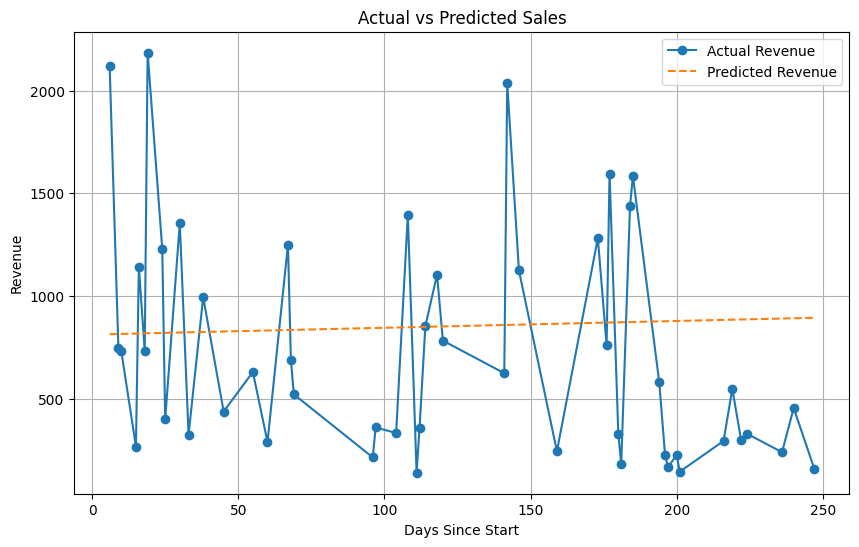

    Day  Predicted_Revenue
0   250         894.358297
1   251         894.689408
2   252         895.020519
3   253         895.351629
4   254         895.682740
5   255         896.013851
6   256         896.344962
7   257         896.676073
8   258         897.007184
9   259         897.338295
10  260         897.669406
11  261         898.000517
12  262         898.331628
13  263         898.662739
14  264         898.993850
15  265         899.324961
16  266         899.656072
17  267         899.987183
18  268         900.318294
19  269         900.649405
20  270         900.980516
21  271         901.311627
22  272         901.642738
23  273         901.973849
24  274         902.304960
25  275         902.636071
26  276         902.967182
27  277         903.298293
28  278         903.629404
29  279         903.960514


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_excel("sample_sales_data.xlsx")
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date').agg({'quantity': 'sum', 'revenue': 'sum'}).reset_index()
daily_sales['days_since_start'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days
X = daily_sales[['days_since_start']]
y = daily_sales['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
plot_df = X_test.copy()
plot_df['Actual'] = y_test
plot_df['Predicted'] = y_pred
plot_df = plot_df.sort_values('days_since_start')

plt.figure(figsize=(10, 6))
plt.plot(plot_df['days_since_start'], plot_df['Actual'], label='Actual Revenue', marker='o')
plt.plot(plot_df['days_since_start'], plot_df['Predicted'], label='Predicted Revenue', linestyle='--')
plt.xlabel("Days Since Start")
plt.ylabel("Revenue")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()
last_day = daily_sales['days_since_start'].max()
future_days = np.arange(last_day + 1, last_day + 31).reshape(-1, 1)
future_preds = model.predict(future_days)
forecast_df = pd.DataFrame({
    'Day': future_days.flatten(),
    'Predicted_Revenue': future_preds
})
print(forecast_df)
